### EDA on the Dataset

In [2]:
import gzip
import json
import pandas as pd

# Load the dataset from the jsonl.gz file
def load_data(file_path):
    data = []
    with gzip.open(file_path, 'rt') as f:
        for line in f:
            review = json.loads(line)
            data.append({
                'rating': review.get('rating', 0),
                'title': review.get('title', ''),
                'text': review.get('text', ''),
                'helpful_vote': review.get('helpful_vote', 0),
                'verified_purchase': review.get('verified_purchase', False),
                'asin': review.get('asin', '')
            })
    return pd.DataFrame(data)

file_path = 'Data_set/All_Beauty.jsonl.gz'
data = load_data(file_path)

### Preview the data

In [3]:
print(data.head())

   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text  helpful_vote  \
0  This spray is really nice. It smells really go...             0   
1  This product does what I need it to do, I just...             1   
2                          Smells good, feels great!             2   
3                                     Felt synthetic             0   
4                                            Love it             0   

   verified_purchase        asin  
0               True  B00YQ6X8EO  
1               True  B081TJ8YS3  
2               True  B07PNNCSP9  
3               True  B09JS339BZ  
4               True  B08BZ63GMJ  


### Summary Statistics

In [4]:
# Summary statistics for the ratings
print(data['rating'].describe())

# Distribution of ratings
print(data['rating'].value_counts())


count    701528.000000
mean          3.960245
std           1.494452
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64
rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64


### Distribution of Ratings

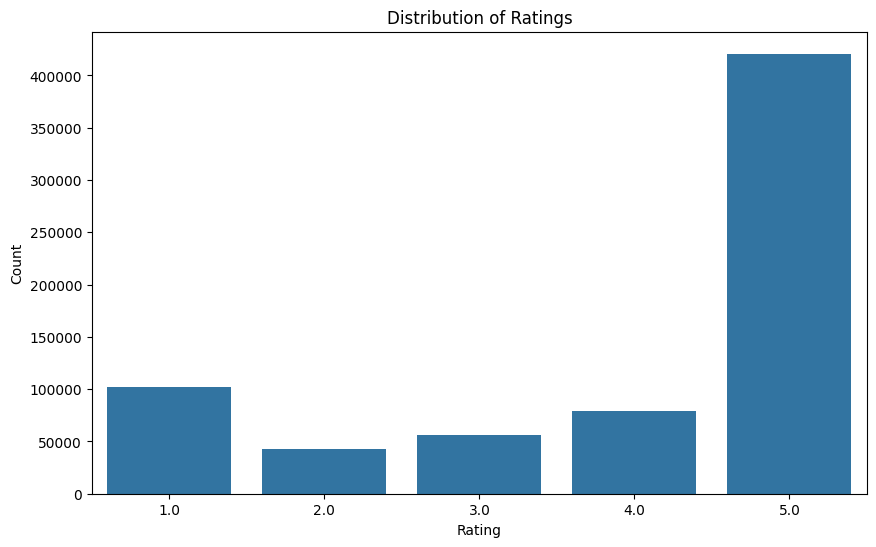

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Text Length Analysis

count    701528.000000
mean        173.031641
std         246.924645
min           0.000000
25%          44.000000
50%         102.000000
75%         209.000000
max       14989.000000
Name: text_length, dtype: float64


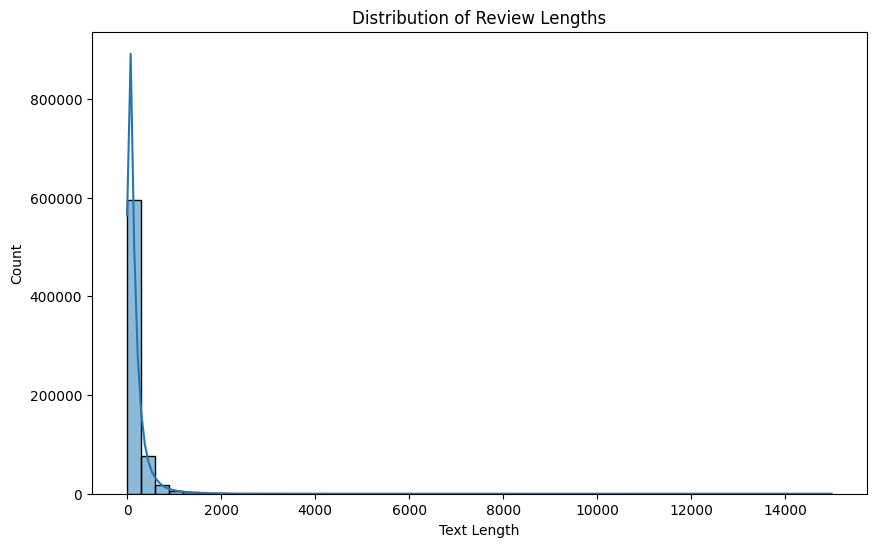

In [6]:
# Add a column for the length of each review
data['text_length'] = data['text'].apply(len)

# Summary statistics for text length
print(data['text_length'].describe())

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


### Word Cloud
#### Generate a word cloud to visualize the most common words in the reviews.

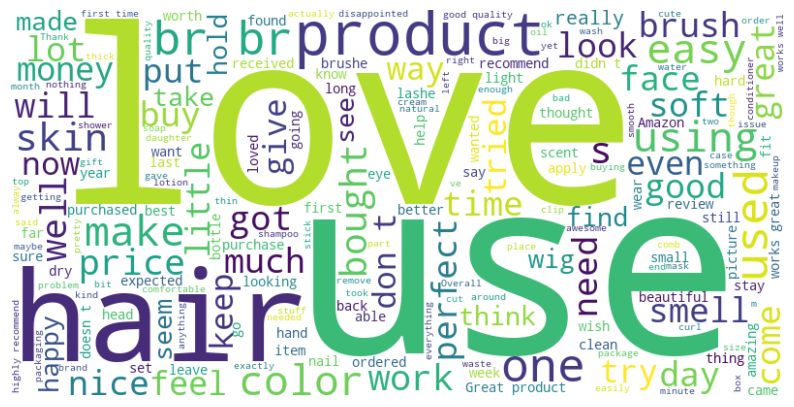

In [7]:
from wordcloud import WordCloud

# Combine all reviews into one string
all_text = ' '.join(data['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Common Words Analysis
#### Identify and visualize the most common words in positive and negative reviews.

In [1]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Add a column for the cleaned text
data['cleaned_text'] = data['text'].apply(remove_stopwords)

# Separate positive and negative reviews
positive_reviews = ' '.join(data[data['rating'] >= 4]['cleaned_text'])
negative_reviews = ' '.join(data[data['rating'] <= 2]['cleaned_text'])

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'data' is not defined

### Helpfulness Votes Analysis

count    701528.000000
mean          0.923588
std           5.471391
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         646.000000
Name: helpful_vote, dtype: float64


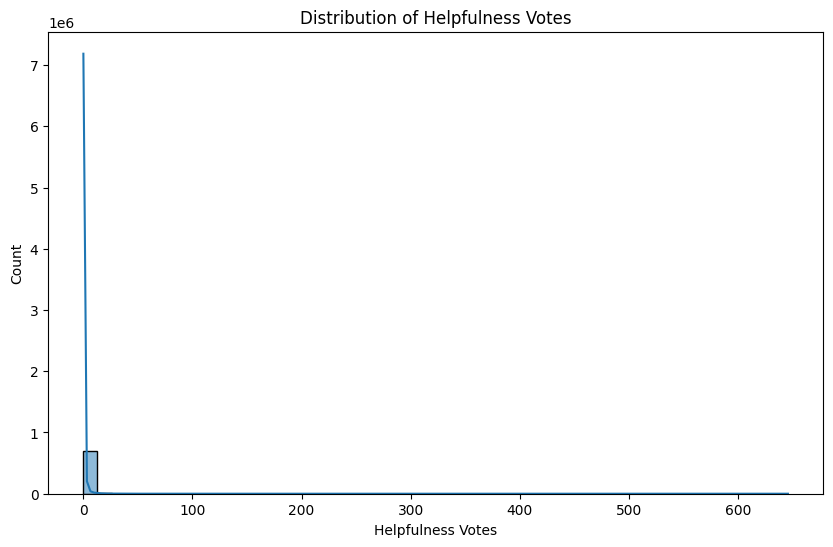

In [9]:
# Summary statistics for helpfulness votes
print(data['helpful_vote'].describe())

# Plot the distribution of helpfulness votes
plt.figure(figsize=(10, 6))
sns.histplot(data['helpful_vote'], bins=50, kde=True)
plt.title('Distribution of Helpfulness Votes')
plt.xlabel('Helpfulness Votes')
plt.ylabel('Count')
plt.show()


### Bought Together Analysis

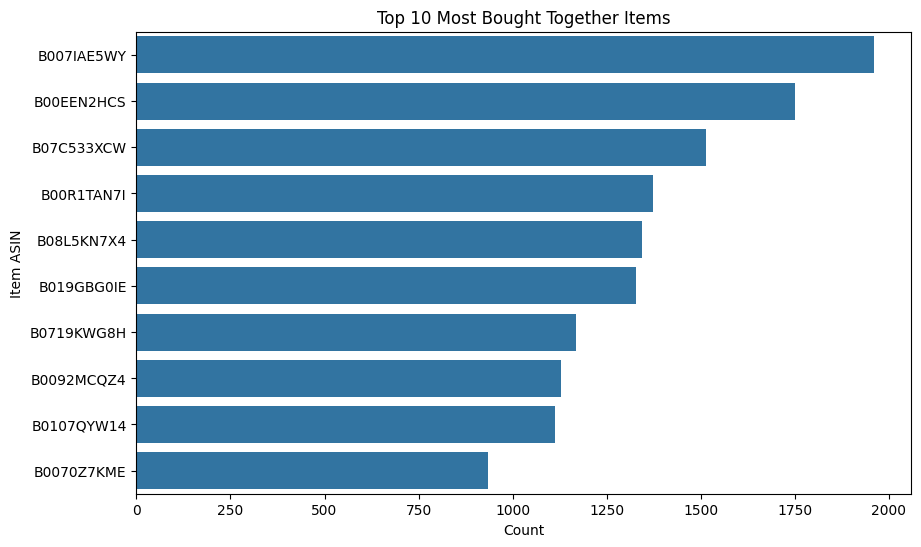

In [11]:
# Assuming 'bought_together' is a feature in the dataset
bought_together_data = data['asin'].value_counts()

# Top 10 most bought together items
top_10_bought_together = bought_together_data.head(10)

# Plot the top 10 bought together items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_bought_together.values, y=top_10_bought_together.index)
plt.title('Top 10 Most Bought Together Items')
plt.xlabel('Count')
plt.ylabel('Item ASIN')
plt.show()


### Model Performance 

### In percentage

### Heatmap obtained after testing